# Avaliação 02 - Introdução ao Aprendizado de Máquina (ENGG67)
**Alunos:**

- **Daniel da Rocha Carneiro**

- **Maurício dos Santos de Jesus**

- **Theo Farias**

----------

## 1) Utilizando um banco de dados sugerido por você, aborde o problema de regressão utilizando o algoritmo k-NN. Implemente a regressão em Jupyter Notebook.

A base de dados escolhida pelo grupo foi a do Setembro Amarelo. O grupo pretende analisar os dados relacionados à taxas de suicídio com fatores socioeconômicos, geracionais e no decorrer dos anos.

----------

Setembro Amarelo: análise do suicídio no Brasil com Data Science
Todos os anos, mais de 12 mil pessoas tiram suas próprias vidas no Brasil. Em um cenário mundial, esse número ultrapassa 1 milhão de pessoas, levando o suicídio a ser considerado um problema de saúde pública.

Para você ter noção da dimensão desses números, saiba que o suicídio tem uma taxa maior do que vítimas de AIDS e da maioria dos tipos de câncer. Segundo a Organização Mundial da Saúde (OMS), o Brasil ocupa o oitavo lugar no número de suicídios no mundo: São 32 brasileiros por dia.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns

%matplotlib inline

In [17]:
# Carregar o arquivo CSV
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv")


**Dicionário de Variáveis**

Este arquivo CSV contém 12 colunas com as seguintes informações:

- `country`: país onde os dados foram registrados. Existem 101 países diferentes no conjunto de dados.
- `year`: ano em que os dados foram registrados, variando de 1987 a 2016.
- `sex`: sexo considerado no registro, podendo ser "male" (masculino) ou "female" (feminino).
- `age`: faixa etária considerada, com as seguintes categorias:
    - "5-14 anos"
    - "15-24 anos"
    - "25-34 anos"
    - "35-54 anos"
    - "55-74 anos"
    - "75+ anos"
- `suicides_no`: número de suicídios registrados para o grupo específico (país, ano, sexo, faixa etária).
- `population`: população do grupo específico.
- `suicides/100k pop`: número de suicídios por 100 mil habitantes no grupo específico.
- `country_year`: identificador que combina o nome do país e o ano.
- `HDI for year`: Índice de Desenvolvimento Humano (IDH) para o ano.
- `gdp_for_year`: Produto Interno Bruto (PIB) para o ano.
- `gdp_per_capita`: Produto Interno Bruto (PIB) per capita.

Essas são as variáveis presentes no conjunto de dados e suas respectivas descrições. Cada linha do conjunto de dados representa informações sobre suicídios em um determinado país, ano, sexo e faixa etária. O conjunto de dados fornece insights sobre suicídios em diferentes contextos demográficos e econômicos.


In [18]:
# ver o formato do DataFrame
print("Formato do DataFrame: ", df.shape)

# ver as 5 primeiras entradas dos dataset
df.head()

Formato do DataFrame:  (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [19]:
# extrair apenas os dados relativos ao Brasil
df_brasil = df[df.country == "Brazil"].copy()

# ver o formato do novo DataFrame
print("Formato do DataFrame: ", df_brasil.shape)

# exibir as 5 primeiras entradas do novo DataFrame
df_brasil.head()

Formato do DataFrame:  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


# **# Análise de Regressão usando KNN**

## Passos principais:

1. Carregar um arquivo CSV contendo os dados de suicídios.
2. Filtrar os dados para incluir apenas as informações do Brasil.
3. Separar as variáveis independentes (características) e a variável dependente (taxa de suicídios).
4. Preencher os valores ausentes nas colunas numéricas com a média.
5. Converter a coluna 'country' em dados numéricos usando codificação one-hot.
6. Normalizar os dados usando o StandardScaler.
7. Dividir os dados em conjuntos de treinamento e teste.
8. Definir uma lista de valores de k para testar.
9. Realizar um loop para cada valor de k, criando um modelo KNN para regressão.
10. Ajustar o modelo aos dados de treinamento e fazer previsões nos dados de teste.
11. Calcular o erro quadrático médio (MSE) para avaliar a precisão das previsões.
12. Armazenar os valores de MSE para cada valor de k.
13. Encontrar o melhor valor de k com o menor MSE.
14. Imprimir o melhor valor de k e o menor MSE.
15. Plotar um gráfico mostrando a variação do MSE em relação ao valor de k.



> No geral, o código realiza um processo de treinamento e teste de um modelo KNN para encontrar o valor de k que resulta na menor taxa de erro na previsão da taxa de suicídios por 100.000 habitantes no Brasil.

> Nesta etapa a regressão k-NN é aplicada somente à variável suicides/100k pop porque o objetivo principal é fazer previsões para essa variável específica. Nesse caso, queremos usar as outras variáveis independentes disponíveis no conjunto de dados (como ano, país, geração, etc.) para prever a taxa de suicídios por 100.000 habitantes.

> O algoritmo k-NN é usado para tarefas de regressão quando queremos prever um valor contínuo com base nas características do conjunto de dados. Ao treinar o modelo de regressão k-NN, ele aprenderá a relação entre as variáveis independentes (como ano, país, geração, etc.) e a variável dependente (taxa de suicídios por 100.000 habitantes) para fazer previsões.

> Ao aplicar a regressão k-NN apenas à variável suicides/100k pop, estamos realizando uma tarefa de regressão univariada, ou seja, estamos considerando apenas uma variável dependente isso é útil pois nosso principal interesse é prever essa variável específica com base em outras características.



Melhor valor de k: 21
Menor MSE: 9.585173327286471


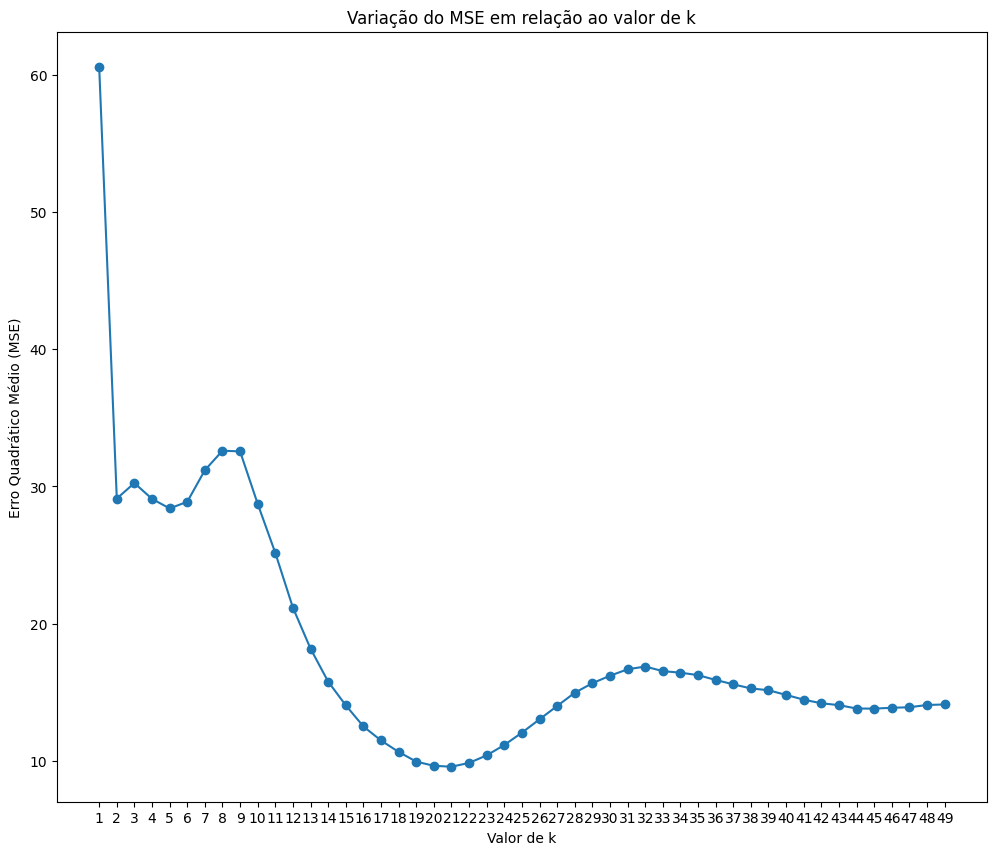

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Carregar o arquivo CSV
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv")

# Filtrar somente os dados do Brasil
df_brazil = df[df['country'] == 'Brazil']

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df_brazil.drop('suicides/100k pop', axis=1)  # Variáveis independentes
y = df_brazil['suicides/100k pop']  # Variável dependente

# Preencher valores ausentes com a média das colunas numéricas
numeric_cols = X.select_dtypes(include=np.number).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# Converter a coluna 'country' em dados numéricos usando one-hot encoding
X_encoded = pd.get_dummies(X)

# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Valores de k a serem testados
k_values = range(1, 50)

# Lista para armazenar os valores de MSE para cada valor de k
mse_values = []

# Loop pelos diferentes valores de k
for k in k_values:
    # Criar o modelo k-NN para regressão
    knn = KNeighborsRegressor(n_neighbors=k)

    # Ajustar o modelo aos dados de treinamento
    knn.fit(X_train, y_train)

    # Fazer previsões nos dados de teste
    y_pred = knn.predict(X_test)

    # Calcular o erro quadrático médio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Encontrar o melhor valor de k
best_k = k_values[np.argmin(mse_values)]
best_mse = np.min(mse_values)
print("Melhor valor de k:", best_k)
print("Menor MSE:", best_mse)

# Plotar o gráfico de variação do MSE em relação ao valor de k
plt.figure(figsize=(12, 10))
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Variação do MSE em relação ao valor de k')
plt.xticks(k_values)
plt.show()


## **Entendendo o resultado obtido**
O código resultou no seguinte output:

Melhor valor de k: 21
Menor MSE: 9.585173327286471

Isso significa que o valor de k que produziu o menor erro quadrático médio (MSE) nas previsões foi 21, e o MSE correspondente foi 9.585173327286471. Esses valores indicam que o modelo KNN com 21 vizinhos produziu as previsões mais precisas para a taxa de suicídios por 100.000 habitantes no Brasil.

## **2ª Etapa da análise de regressão usando kNN**

No código abaixo repetimos a regressão e os dados são divididos em conjuntos de treinamento e teste, com 80% dos dados destinados ao treinamento e 20% para teste. O valor de k é definido como 21 e um modelo KNN é criado para regressão, ajustado aos dados de treinamento e usado para fazer previsões nos dados de teste.

O desempenho do modelo é avaliado calculando o erro quadrático médio (MSE) e o coeficiente de determinação (R2) entre as previsões e os valores reais. Além disso, é realizada uma validação cruzada com 5 folds para estimar o desempenho médio do modelo em diferentes conjuntos de dados.

O código também inclui a criação de gráficos para visualizar os resultados. Um gráfico de dispersão 3D mostra a relação entre três variáveis independentes (ano, PIB per capita e população) e a taxa de suicídios, com os dados de treinamento e as previsões destacadas. Dois gráficos de dispersão 2D são plotados para mostrar a relação entre cada variável independente (ano e PIB per capita) e a taxa de suicídios, com os dados reais e as previsões obtidas por meio da validação cruzada.

No geral, o código realiza todas as etapas necessárias para treinar um modelo KNN de regressão, avaliar seu desempenho e visualizar os resultados. Ele fornece insights sobre a relação entre as variáveis independentes e a taxa de suicídios no Brasil, além de fornecer uma medida de quão bem o modelo é capaz de fazer previsões.

Erro quadrático médio (MSE): 9.585173327286471
Coeficiente de determinação (R2): 0.7016479595261307
Scores de validação cruzada: [0.54192963 0.51700122 0.59658904 0.58909988 0.66693222]
Média dos scores de validação cruzada: 0.5823103997696963


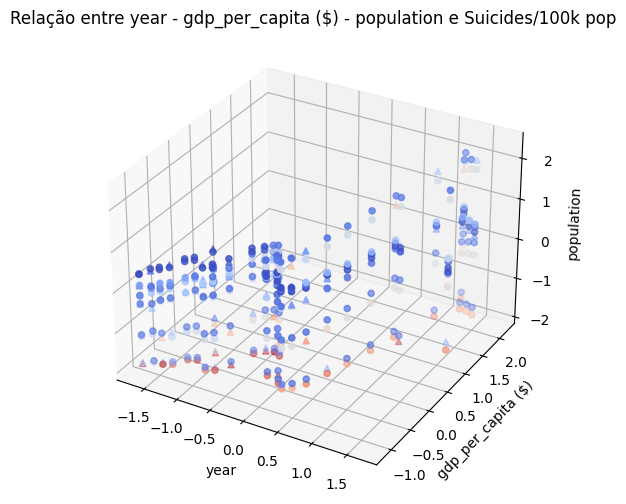

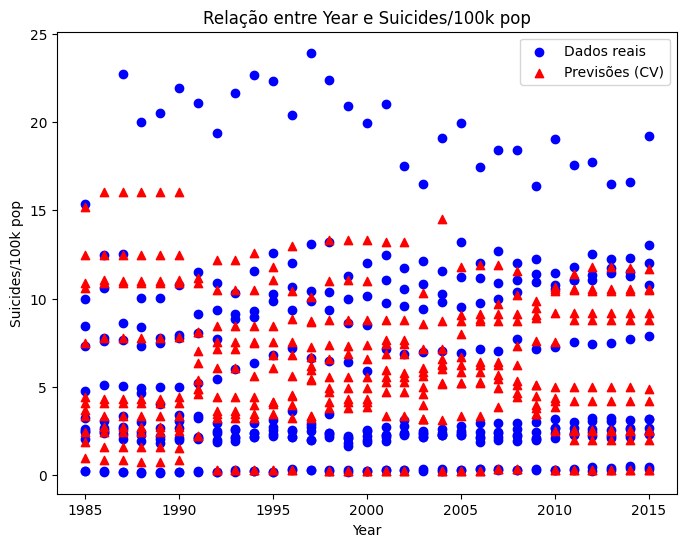

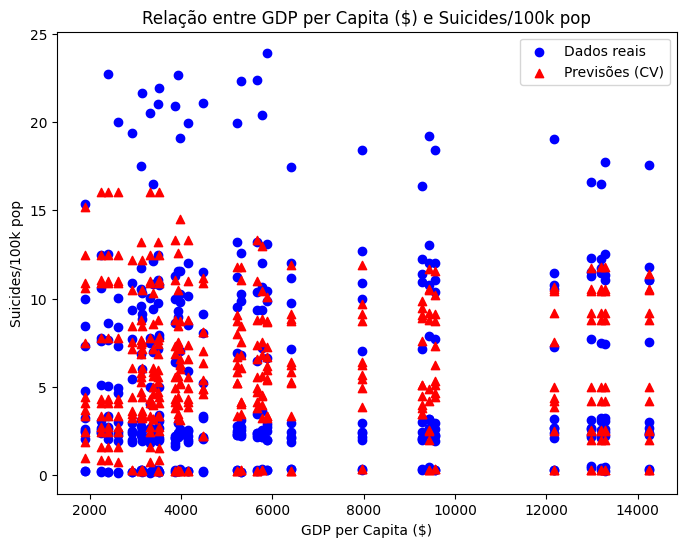

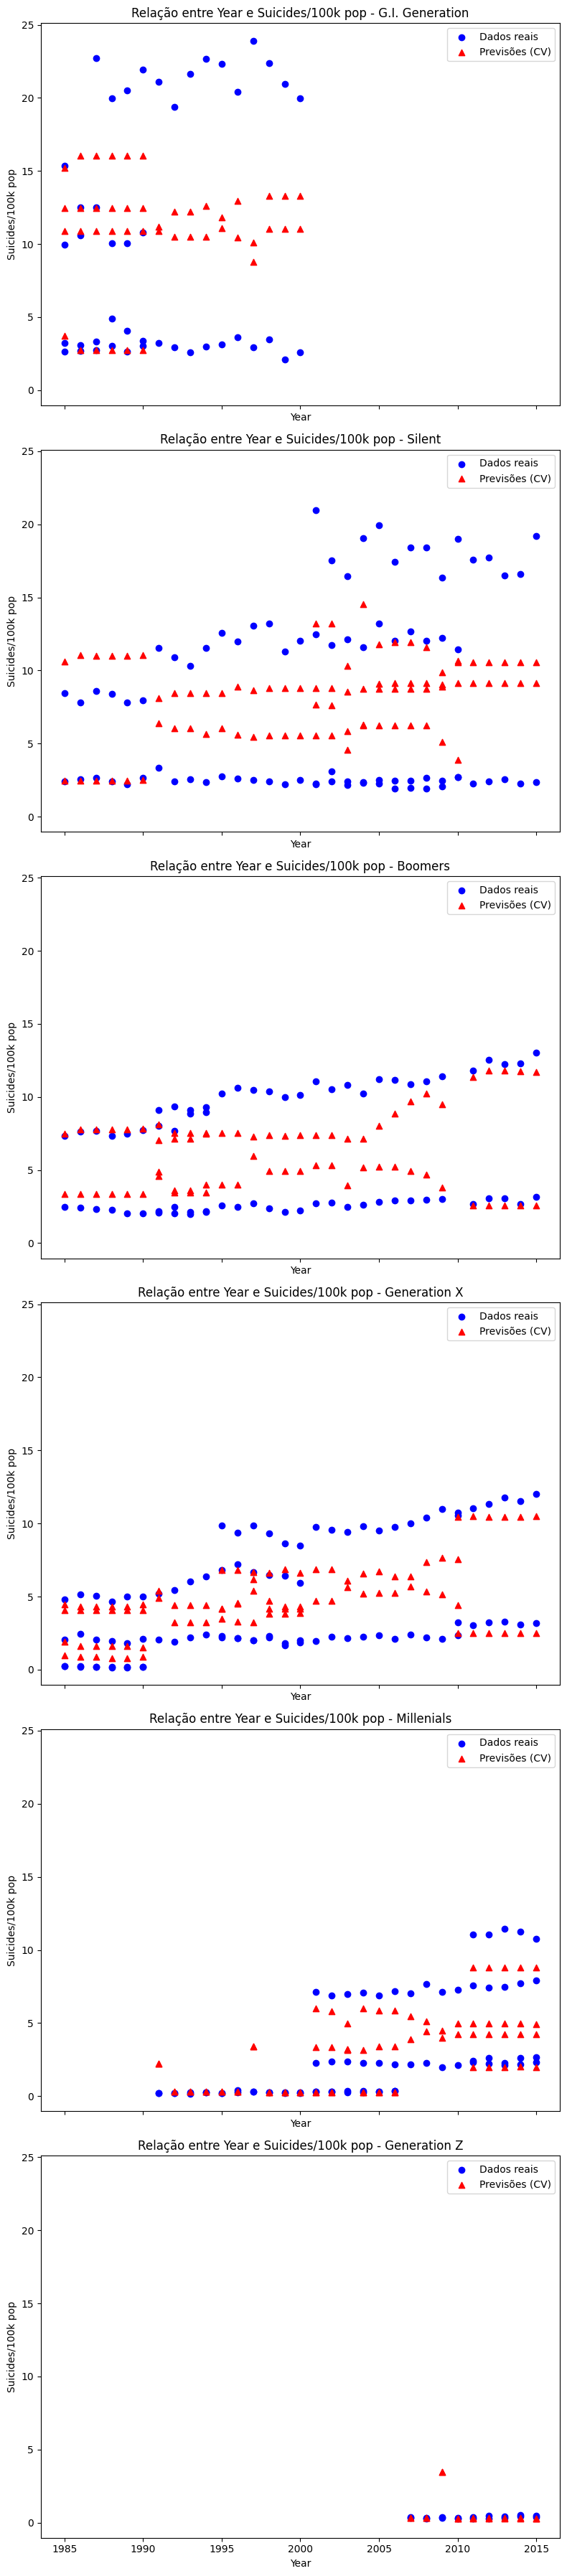

In [10]:
# Importar bibliotecas adicionais
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Filtrar somente os dados do Brasil
df_brazil = df[df['country'] == 'Brazil']

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df_brazil.drop('suicides/100k pop', axis=1)  # Variáveis independentes
y = df_brazil['suicides/100k pop']  # Variável dependente

# Preencher valores ausentes com a média das colunas numéricas
numeric_cols = X.select_dtypes(include=np.number).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# Converter a coluna 'country' em dados numéricos usando one-hot encoding
X_encoded = pd.get_dummies(X)

# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Criar o modelo k-NN para regressão
k = 21  # Valor de k
knn = KNeighborsRegressor(n_neighbors=k)

# Ajustar o modelo aos dados de treinamento
knn.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = knn.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R2):", r2)

# Realizar validação cruzada
cv_scores = cross_val_score(knn, X_normalized, y, cv=5)
print("Scores de validação cruzada:", cv_scores)
print("Média dos scores de validação cruzada:", np.mean(cv_scores))

# Fazer previsões com validação cruzada
y_pred_cv = cross_val_predict(knn, X_normalized, y, cv=5)

# Criar um gráfico de dispersão 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Selecionar três variáveis independentes para o gráfico 3D
x_var = 'year'
y_var = 'gdp_per_capita ($)'
z_var = 'population'

# Plotar os dados de treinamento
ax.scatter(X_train[:, X_encoded.columns.get_loc(x_var)],
           X_train[:, X_encoded.columns.get_loc(y_var)],
           X_train[:, X_encoded.columns.get_loc(z_var)],
           c=y_train, cmap='coolwarm')

# Plotar os dados de teste
ax.scatter(X_test[:, X_encoded.columns.get_loc(x_var)],
           X_test[:, X_encoded.columns.get_loc(y_var)],
           X_test[:, X_encoded.columns.get_loc(z_var)],
           c=y_pred, cmap='coolwarm', marker='^')

# Configurar os rótulos dos eixos
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)
ax.set_title('Relação entre {} - {} - {} e Suicides/100k pop'.format(x_var, y_var, z_var))

# Mostrar o gráfico
plt.show()

# Gráfico 2D: Relação entre year e suicides/100k pop
plt.figure(figsize=(8, 6))
plt.scatter(X_encoded['year'], y, c='b', label='Dados reais')
plt.scatter(X_encoded['year'], y_pred_cv, c='r', marker='^', label='Previsões (CV)')
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop')
plt.title('Relação entre Year e Suicides/100k pop')
plt.legend()
plt.show()

# Gráfico 2D: Relação entre gdp_per_capita ($) e suicides/100k pop
plt.figure(figsize=(8, 6))
plt.scatter(X_encoded['gdp_per_capita ($)'], y, c='b', label='Dados reais')
plt.scatter(X_encoded['gdp_per_capita ($)'], y_pred_cv, c='r', marker='^', label='Previsões (CV)')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides/100k pop')
plt.title('Relação entre GDP per Capita ($) e Suicides/100k pop')
plt.legend()
plt.show()

# Criar um gráfico de dispersão por geração
generations = df_brazil['generation'].unique()
num_generations = len(generations)
fig, axs = plt.subplots(num_generations, figsize=(8, 6*num_generations), sharex=True, sharey=True)

for i, generation in enumerate(generations):
    axs[i].scatter(X_encoded.loc[df_brazil['generation'] == generation, 'year'], 
                   y[df_brazil['generation'] == generation],
                   c='b', label='Dados reais')
    axs[i].scatter(X_encoded.loc[df_brazil['generation'] == generation, 'year'], 
                   y_pred_cv[df_brazil['generation'] == generation],
                   c='r', marker='^', label='Previsões (CV)')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Suicides/100k pop')
    axs[i].set_title('Relação entre Year e Suicides/100k pop - {}'.format(generation))
    axs[i].legend()

# Mostrar os gráficos
plt.tight_layout()
plt.show()



## **Com base nas métricas fornecidas, podemos fazer algumas considerações:**

-  Erro Quadrático Médio (MSE): O MSE de 9.585173327286471 indica que, em média, o modelo tem um erro de cerca de 9.59 na taxa de suicídios por 100.000 habitantes, um MSE de 9.59 pode é considerado satisfatório.

-  Coeficiente de Determinação (R2): O valor de R2 de 0.7016479595261307 indica que aproximadamente 70.17% da variância na taxa de suicídios é explicada pelas variáveis independentes. Quanto mais próximo de 1, melhor é o ajuste do modelo aos dados. Um valor de R2 de 0.7016 sugere um ajuste razoável, mas ainda existe uma parte da variabilidade que não é explicada pelas variáveis independentes.

-  Scores de Validação Cruzada: Os scores de validação cruzada variam de 0.517 a 0.667, com uma média de 0.582. Esses scores representam a performance média do modelo em diferentes divisões dos dados. Um score médio de 0.582 indica que o modelo tem um desempenho moderado na generalização para novos conjuntos de dados.

-  Em geral, as métricas sugerem que o modelo de regressão kNN possui um desempenho razoável na previsão da taxa de suicídios por 100.000 habitantes no Brasil. No entanto, é sempre recomendado comparar essas métricas com outros modelos de regressão e considerar o contexto específico do problema antes de concluir sobre a satisfação do modelo. Além disso, é importante considerar outras métricas relevantes e realizar uma análise mais aprofundada para tomar uma decisão mais precisa sobre a adequação do modelo.


> ## **Entendendo as variáveis**

O valor de k para o modelo de regressão k-NN é escolhido com base no desempenho nos dados de treinamento. É o número de vizinhos mais próximos considerados para fazer uma previsão. Um valor inadequado de k pode levar a um modelo superajustado (overfitting) ou subajustado (underfitting).

Por outro lado, o valor de k para a validação cruzada é escolhido com o objetivo de avaliar o desempenho do modelo em dados não vistos. Durante a validação cruzada, o conjunto de dados é dividido em várias dobras (folds) e o modelo é treinado e avaliado repetidamente em diferentes combinações de folds. Cada vez, um subconjunto dos dados é usado como conjunto de teste e os demais como conjunto de treinamento. O valor de k na validação cruzada é escolhido para obter uma estimativa geral do desempenho do modelo em dados não vistos.

Assim, o valor de k para o modelo de regressão k-NN pode ser diferente do valor de k na validação cruzada, pois eles têm propósitos diferentes. O valor de k no modelo de regressão é otimizado para obter um bom desempenho nos dados de treinamento, enquanto o valor de k na validação cruzada é escolhido para avaliar o desempenho geral do modelo em dados não vistos e evitar o superajuste ou subajuste.



As previsões (CV) se referem às previsões feitas pelo modelo de regressão k-NN utilizando a técnica de validação cruzada (CV).

A validação cruzada é uma técnica usada para avaliar o desempenho do modelo de forma mais robusta, fornecendo uma estimativa mais precisa de como o modelo irá se sair em dados não vistos. Em vez de dividir os dados apenas em conjunto de treinamento e teste, a validação cruzada divide os dados em várias partes, ou "folds", e realiza repetidamente o treinamento e a avaliação do modelo em diferentes combinações desses folds.

No código fornecido, a função cross_val_predict do scikit-learn é usada para fazer previsões com validação cruzada. Ela executa o processo de validação cruzada internamente, treinando o modelo em diferentes partes dos dados e fazendo previsões nos folds de teste. As previsões resultantes são combinadas em uma única matriz de previsões.

Assim, as previsões (CV) mostram as previsões feitas pelo modelo k-NN em dados não vistos durante a validação cruzada, permitindo uma avaliação mais abrangente do desempenho do modelo em diferentes partes dos dados. Isso ajuda a entender como o modelo se comporta de maneira mais geral e se as previsões são consistentes em diferentes conjuntos de dados.

